В этом дз необходимо обучить модели для классификации. Cегодня попробуем отличать настоящие новости от фейковых



In [ ]:
# ячейка импортов

import numpy as np
import pandas as pd

# импорт моделей
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import classification_report # табличка с метриками

import matplotlib.pyplot as plt
from collections import Counter


# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline 

# Exploratory Data Analysis (EDA)



In [ ]:
! unzip "news_fake-n-true.csv.zip"

Archive:  news_fake-n-true.csv.zip
  inflating: news_fake-n-true.csv    
  inflating: __MACOSX/._news_fake-n-true.csv  


In [ ]:
data = pd.read_csv("news_fake-n-true.csv")
data.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


**колонка label отвечает за тип новости: настоящие имеют лейбл 1,  фейковые новости -- с лейблом 0** 

In [ ]:
# создадим новый датафрейм из старого

data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)

display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

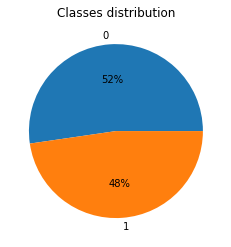

In [ ]:
classes =pd.value_counts(data_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

**давайте попробуем предсказать:** окажется ли текст настоящей новостью или фейковой

- Векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку

Попробуйте обучить разные модели для классификации на данных
1. Naive Bayes
2. SVM 
3. Decision Trees
4. Random Forest
5. Boosting

Для каждой модели посмотрите на метрики с помощью функции [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Какая/какие модель/ли справляются с задачей наиболее эффективно?

1. Naive Bayes

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["text"])
#print(f.get_feature_names()) # посмотрим на признаки



In [ ]:
# новые переменные
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], 
                                                                    test_size=0.2, random_state=50)

# print(X_train.shape, X_test.shape)
sum(y_test == 1)

4262

In [ ]:
list_alpha = np.arange(1/10000000, 1, 0.05) 
#возьмем лист равномерно распределенных значений от 1/100000 до 20(можно выбрать другие числа,эти были выбраны экспериментально)


score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [ ]:
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    # score_train? 
    
    score_test[count]= bayes.score(X_test, y_test)
    # score_test ? 
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.000000e-07,0.981708,0.961024,0.946739,0.970418
1,5.000010e-02,0.966368,0.958463,0.953778,0.958500
2,1.000001e-01,0.964753,0.958018,0.953778,0.957597
3,1.500001e-01,0.963751,0.957795,0.953778,0.957146
4,2.000001e-01,0.962943,0.958018,0.954247,0.957166
5,2.500001e-01,0.962609,0.958018,0.954247,0.957166
6,3.000001e-01,0.962108,0.957461,0.953778,0.956471
7,3.500001e-01,0.961774,0.957461,0.954012,0.956256
8,4.000001e-01,0.961301,0.956904,0.954012,0.955133
9,4.500001e-01,0.960967,0.956793,0.953778,0.955122


(20, 5)

In [ ]:
best_index = models['Test Precision'].idxmax()
best_index

# display(best_index)

display(models.iloc[best_index])

alpha             1.000000e-07
Train Accuracy    9.817083e-01
Test Accuracy     9.610245e-01
Test Recall       9.467386e-01
Test Precision    9.704185e-01
Name: 0, dtype: float64

In [ ]:
models[models['Test Recall']>0.9].sort_values(by="Test Precision", ascending = False)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.000000e-07,0.981708,0.961024,0.946739,0.970418
1,5.000010e-02,0.966368,0.958463,0.953778,0.958500
2,1.000001e-01,0.964753,0.958018,0.953778,0.957597
4,2.000001e-01,0.962943,0.958018,0.954247,0.957166
5,2.500001e-01,0.962609,0.958018,0.954247,0.957166
3,1.500001e-01,0.963751,0.957795,0.953778,0.957146
6,3.000001e-01,0.962108,0.957461,0.953778,0.956471
7,3.500001e-01,0.961774,0.957461,0.954012,0.956256
8,4.000001e-01,0.961301,0.956904,0.954012,0.955133
9,4.500001e-01,0.960967,0.956793,0.953778,0.955122


In [ ]:
bayes = naive_bayes.MultinomialNB(alpha= 1.000000e-09) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,label,predicted
18322,0,0
6805,0,0
11776,0,0
43603,1,1
1166,1,1
...,...,...
3814,0,0
27520,1,1
11071,0,1
2479,0,0


In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))


pd.DataFrame(data = m_confusion_test, columns = ['Predicted news', 'Predicted fakes'],
            index = ['Actual news', 'Actual fakes'])

,Predicted news,Predicted fakes
Actual news,4598,120
Actual fakes,238,4024


In [ ]:
y_true = y_test
y_pred = bayes.predict(X_test)
print(classification_report(y_true, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4718
           1       0.97      0.94      0.96      4262

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



2. SVM

> Метод опорных векторов применить не удалось из-за большого размера датасета и, соответственно, очень большого количества времени, необходимого для его обработки.



3. Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, tree_y_pred))

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, tree_y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted news', 'Predicted fakes'],
            index = ['Actual news', 'Actual fakes'])

,Predicted news,Predicted fakes
Actual news,4700,18
Actual fakes,17,4245


4. Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=500, verbose=1)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
print(classification_report(y_test, forest_y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 11.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4718
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.8s finished


In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, forest_y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted news', 'Predicted fakes'],
            index = ['Actual news', 'Actual fakes'])

,Predicted news,Predicted fakes
Actual news,4677,41
Actual fakes,22,4240


5. Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=10, verbose=1)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, gb_y_pred))

      Iter       Train Loss   Remaining Time 
         1           1.1982           52.07m
         2           1.0459           50.56m
         3           0.9191           50.02m
         4           0.8120           49.52m
         5           0.7206           49.40m
         6           0.6419           49.27m
         7           0.5738           49.34m
         8           0.5145           49.42m
         9           0.4622           49.35m
        10           0.4167           49.44m
        20           0.1666           48.90m
        30           0.0856           48.31m
        40           0.0556           47.55m
        50           0.0434           46.63m
        60           0.0394           45.87m
        70           0.0332           45.11m
        80           0.0305           44.46m
        90           0.0288           43.76m
       100           0.0273           43.16m
       200           0.0181           37.80m
       300           0.0128           32.86m
       40

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, gb_y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted news', 'Predicted fakes'],
            index = ['Actual news', 'Actual fakes'])

,Predicted news,Predicted fakes
Actual news,4696,22
Actual fakes,9,4253


Boosting + Early Stopping

In [ ]:
gb_clf_es = GradientBoostingClassifier(n_iter_no_change=5, verbose=10)
gb_clf_es.fit(X_train, y_train)
es_y_pred = gb_clf_es.predict(X_test)
print(classification_report(y_test, es_y_pred))

      Iter       Train Loss   Remaining Time 
         1           1.1981            4.59m
         2           1.0458            4.44m
         3           0.9188            4.34m
         4           0.8116            4.24m
         5           0.7201            4.17m
         6           0.6414            4.16m
         7           0.5732            4.14m
         8           0.5138            4.09m
         9           0.4619            4.06m
        10           0.4162            4.00m
        11           0.3760            3.94m
        12           0.3403            3.90m
        13           0.3088            3.87m
        14           0.2808            3.82m
        15           0.2559            3.76m
        16           0.2338            3.72m
        17           0.2141            3.68m
        18           0.1964            3.64m
        19           0.1808            3.60m
        20           0.1665            3.57m
        21           0.1538            3.52m
        2

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, es_y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted news', 'Predicted fakes'],
            index = ['Actual news', 'Actual fakes'])

,Predicted news,Predicted fakes
Actual news,4685,33
Actual fakes,10,4252


**Вывод**

> Наилучшие результаты показал Boosting. Чуть хуже справилась модель Boosting + Early Stopping. Далее по степени эффективности следуют Decision Tree, Random Forest и Naive Bayes.